In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [111]:
#Dicionario 
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

In [112]:
# Carregar arquivo para um DataFrame
df_vendas = pd.DataFrame(dados_vendas)
df_vendas

,mes,vendas
0,Janeiro,2000
1,Fevereiro,2200
2,Março,2300
3,Abril,2500
4,Maio,2600
5,Junho,2700
6,Julho,2800
7,Agosto,2900
8,Setembro,3000
9,Outubro,3100


In [113]:
#EDA
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     12 non-null     object
 1   vendas  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [114]:
df_vendas.dtypes

mes       object
vendas     int64
dtype: object

In [115]:
#Convertendo string para indices númericos
df_vendas['mes_numero'] = range(1, 13)


In [116]:
# Dividir conjunto entre treino e teste

X = df_vendas[['mes_numero']]
y = df_vendas['vendas']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)


In [117]:
# Treinar o algoritmo de Regressão Linear 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [118]:
# Gerar Predições do conjunto de testes
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [119]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 2096.1805555555525
R^2 Score: 0.9631440781440782


In [120]:
# Exibir os coeficientes do modelo
print(f"Intercepto: {model.intercept_}")
print(f"Coeficiente: {model.coef_}")


Intercepto: 1963.3333333333333
Coeficiente: [114.16666667]


In [121]:
# Prever as vendas para o mês de Dezembro (mes_numero = 12)
print(f"Previsão de vendas para Dezembro: {round(previsao_dezembro[0], 2)}")

Previsão de vendas para Dezembro: 3333.33


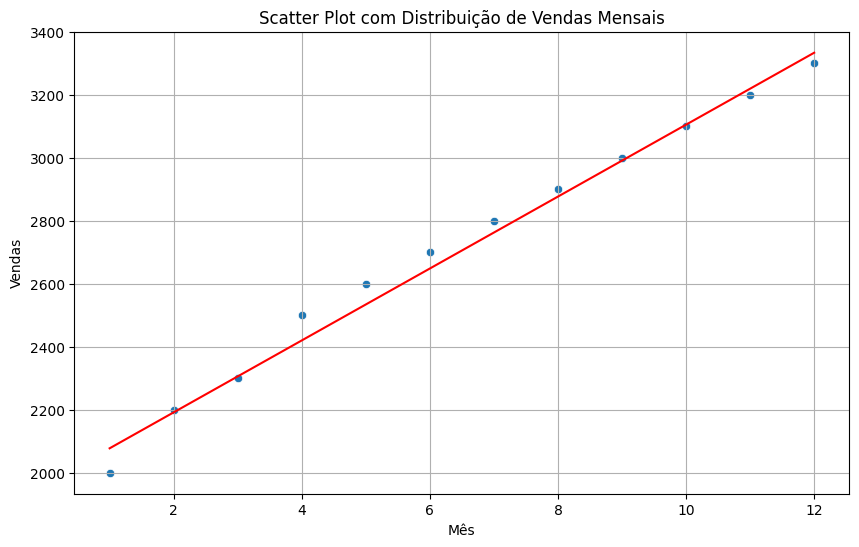

In [122]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mes_numero', y='vendas', data=df_vendas)
plt.plot(df_vendas['mes_numero'], model.predict(df_vendas[['mes_numero']]), color='red')
plt.title('Scatter Plot com Distribuição de Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()

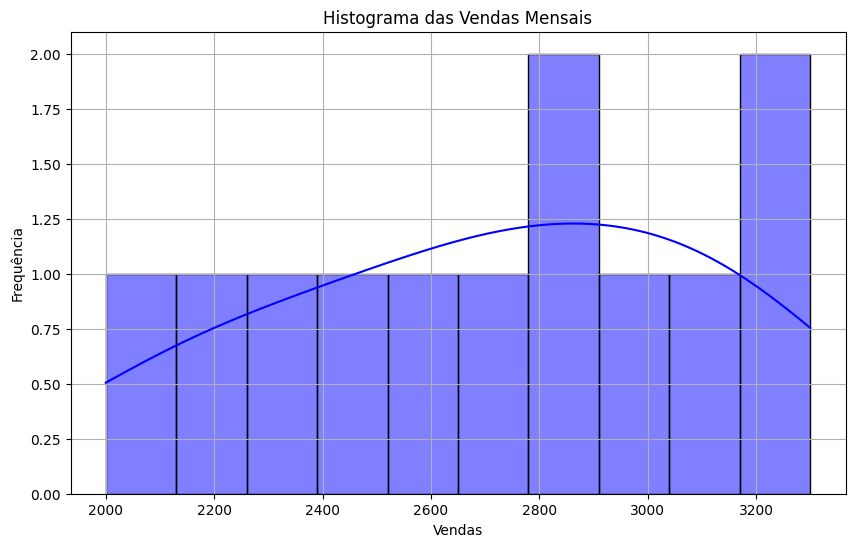

In [123]:
plt.figure(figsize=(10, 6))
sns.histplot(df_vendas['vendas'], bins=10, kde=True, color='blue')  # 'bins' define o número de barras
plt.title('Histograma das Vendas Mensais')
plt.xlabel('Vendas')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()